In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data splitting and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow and Keras for building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K

In [2]:
# Custom Activation: Radbas 
def radbas(x):
    """
    Radial basis activation function defined as exp(-x^2),
    which mimics MATLAB's 'radbas' transfer function.
    """
    return K.exp(-K.square(x))

In [3]:
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')
data = data.dropna()

# Define the predictors: Amp, L, L1, L2, and p2
X = data[['Amp', 'L', 'L1', 'L2', 'p2']].values

# Define the targets: tnextmax, l3max, and p3max
y = data[[ 'tnextmax']].values

In [4]:
# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Define the Neural Network Model
#   Layer 1: logsig   (sigmoid in Keras)
#   Layer 2: radbas   (custom radbas)
#   Layer 3: radbas   (custom radbas)
#   Layer 4: purelin  (linear)

model4_matlab = Sequential([
    # Layer 1: 10 neurons with logistic sigmoid activation (logsig)
    Dense(10, activation='sigmoid', input_shape=(5,)), # 5 inputs
    
    # Layer 2: 10 neurons with radial basis activation (radbas)
    Dense(10, activation=radbas),
    
    # Layer 3: 10 neurons with radial basis activation (radbas)
    Dense(10, activation=radbas),
    
    # Layer 4: 10 neurons with linear activation (purelin)
    Dense(10, activation='linear'),
    
    # Output layer: map the 10 neurons to 1 output (linear for regression)
    Dense(1, activation='linear')
])


C:\Users\Lawan Wijayasooriya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model using Mean Squared Error loss and the Adam optimizer
model4_matlab.compile(optimizer='adam', loss='mse')

In [7]:
# Display the model summary 
model4_matlab.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
print(X_train.shape)   # should be (num_samples, 5)

(144589, 5)


In [9]:
# Train the model
history_matlab = model4_matlab.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [10]:
# Evaluate the Model on Test Data

y_pred = model4_matlab.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.4f}".format(mse))
print("R^2 Score: {:.4f}".format(r2))

1130/1130 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step 
Mean Squared Error: 0.1764
R^2 Score: 0.9998


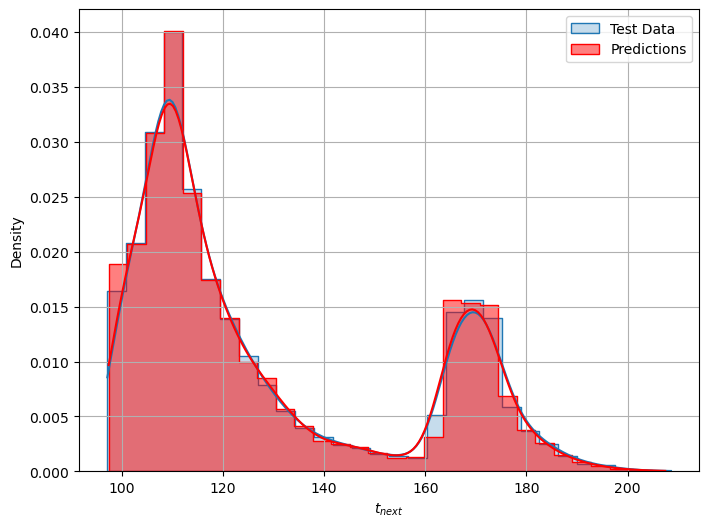

In [12]:
# Visualize Prediction Distribution vs. Test Data
plt.figure(figsize=(8, 6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Test Data', stat='density', element="step")
sns.histplot(y_pred, bins=30, kde=True, color='red', label='Predictions', stat='density', element="step")
plt.xlabel(r'$t_{next}$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Soheil_5input_NN_comparison_tnext.png', dpi=300, bbox_inches='tight')
plt.show()

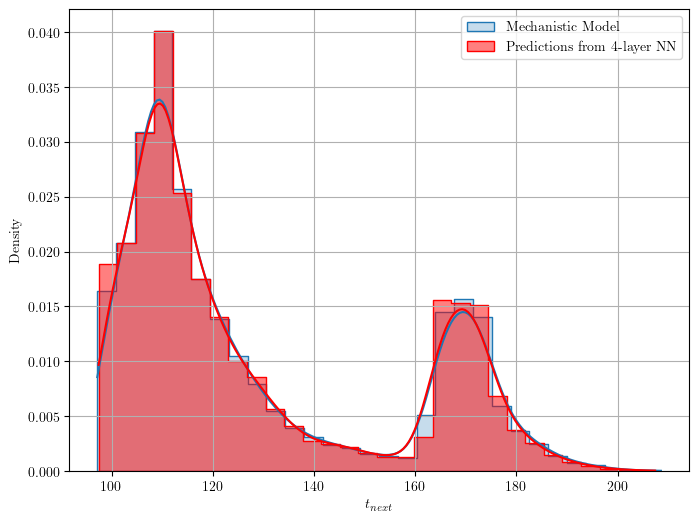

In [15]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

#
mpl.rcParams['text.usetex'] = True                       # Enable full LaTeX rendering
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']   # Use LaTeX default font
mpl.rcParams['axes.formatter.use_mathtext'] = False      # Disable mathtext formatting so LaTeX is used for all text
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath for \text

################
# Visualize Prediction Distribution vs. Test Data
plt.figure(figsize=(8, 6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Mechanistic Model', stat='density', element="step")
sns.histplot(y_pred, bins=30, kde=True, color='red', label='Predictions from 4-layer NN', stat='density', element="step")
plt.xlabel(r'$t_{next}$')
plt.ylabel(r'$\text{Density}$')
plt.legend()
plt.grid(True)
plt.savefig('Soheil_5input_NN_comparison2_tnext.png', dpi=300, bbox_inches='tight')
plt.show()

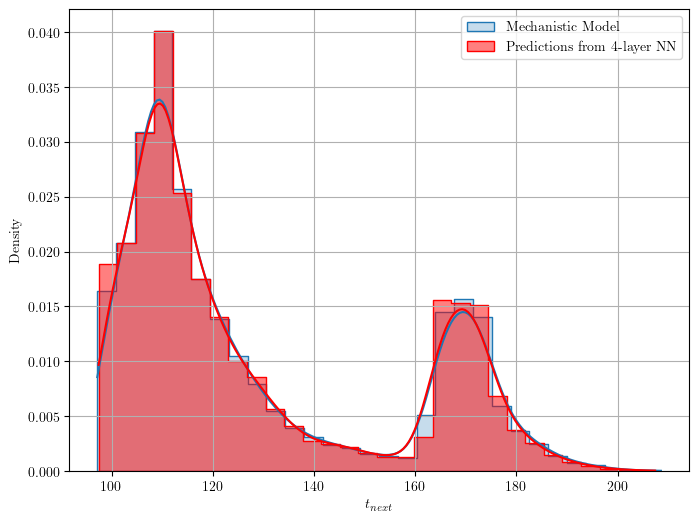

In [16]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

#
mpl.rcParams['text.usetex'] = True                       # Enable full LaTeX rendering
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']   # Use LaTeX default font
mpl.rcParams['axes.formatter.use_mathtext'] = False      # Disable mathtext formatting so LaTeX is used for all text
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath for \text

################
# Visualize Prediction Distribution vs. Test Data
plt.figure(figsize=(8, 6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Mechanistic Model', stat='density', element="step")
sns.histplot(y_pred, bins=30, kde=True, color='red', label='Predictions from 4-layer NN', stat='density', element="step")
plt.xlabel(r'$t_{next}$')
plt.ylabel(r'$\text{Density}$')
plt.legend()
plt.grid(True)
plt.savefig('Soheil_5input_I0_80_NN_comparison2_tnext.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
new_input = pd.DataFrame({
    'Amp': [90],
    'L': [130],
    'L1':[24.8],
    # 'p1':[38.99263],
    'L2':[104.7],
    'p2':[30.80827] 
})
prediction_new = model4_matlab.predict(new_input.values)
print("4 Layer NN - Prediction with 5 inputs: {:.2f}".format(prediction_new[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4 Layer NN - Prediction with 5 inputs: 183.46


In [22]:
model4_matlab.save('model4_matlab.keras') # the model will save as 'model2_matlab.keras'
